
# <span style="color:rgb(213,80,0)">ODE solvers</span>

### Problem 1 \- Simple ODEs
<p style="text-align:left">
   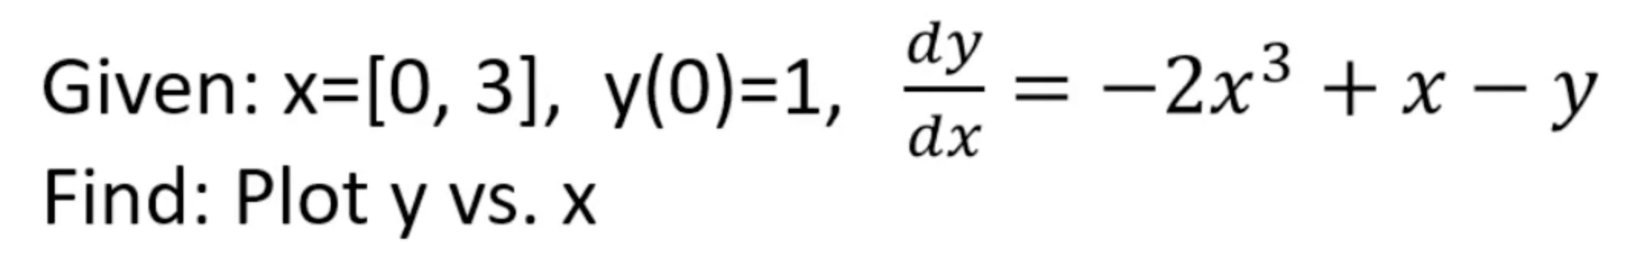
</p>


In [1]:
clc; clearvars; close all;


First define required differential function using inline function


In [2]:
f = @(x,y) (-2.*x.^3 + x - y); % use element wise operators in case "x" is a vector


ode45 takes 3 major inputs:


1. f \-> function to solve


2. \[0 3\] \-> interval of integration


3. 1 \-> initial condition


In [3]:
[x,y] = ode45(f,[0 3],1);


Plot to see the results


In [4]:
plot(x,y,'go')


Compare with dsolve(analytical) solution



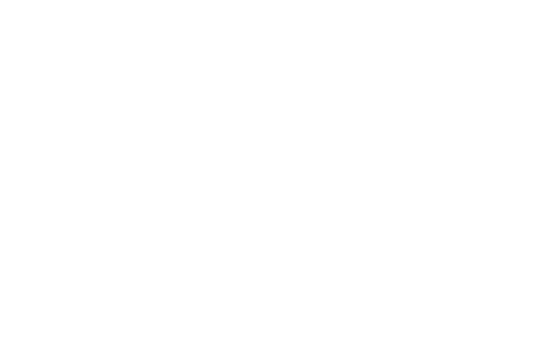

In [5]:
hold on

syms y(x)
eq = diff(y,x,1) == -2*x^3 + x - y;
cond = [y(0) == 1];

sol = dsolve(eq,cond);

fplot(sol,'r') % Functions can be plotted using fplot command
xlim([0 3]) % Restriced the plot for x = [0,3]

### Problem 2 \- System of ODEs
<p style="text-align:left">
   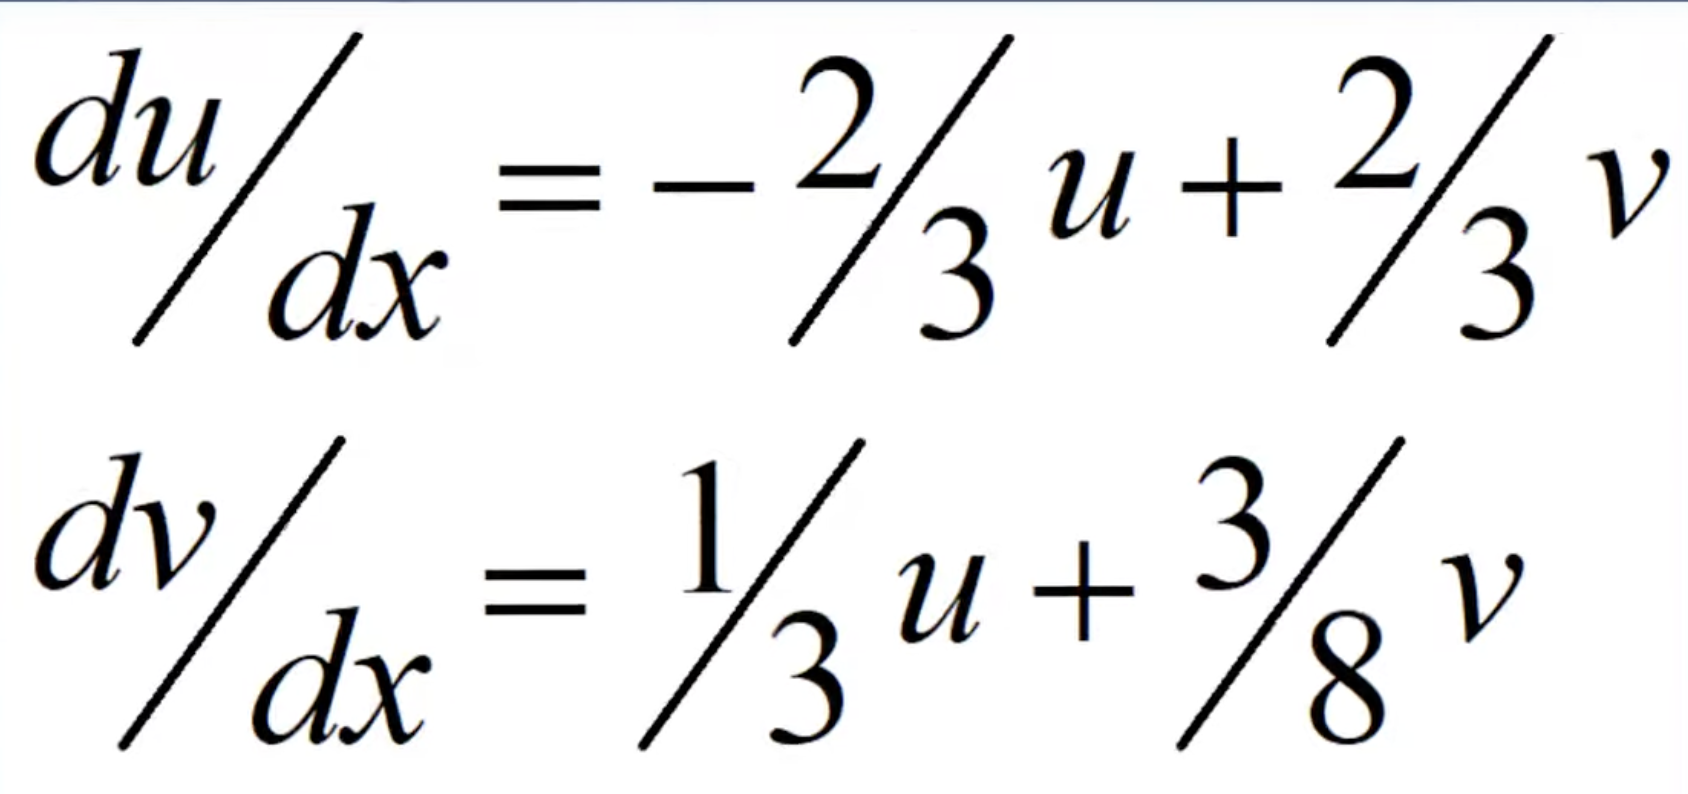
</p>


**Here only x is the independent variable**

1.  Firstly take out x common from LHS so that d/dx (y) = \[\] where y = \[u;v\] and dt = RHS in vector form
2. Then make a function for the rhs vector

In [6]:
clc, clearvars, close all;

function dydt = t(x,y)
    u = y(1);
    v = y(2);
    dydt = [(-2/3)*u + (2/3)*v; (1/3)*u + (3/8)*v];
end


Then use ode45 function to solve



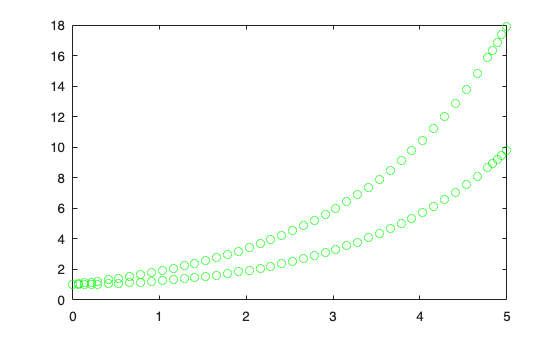

In [7]:
[x,y] = ode45(@t, [0 5], [1 1]);
plot(x,y,'go')

### Problem 3 \- Best practive and constants
<p style="text-align:left">
   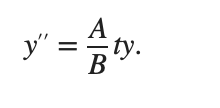
</p>


A = 1, B = 2, t = \[0 5\], IC = \[0, 0.01\]


In [8]:
clc; clear; close all;


Best practive is to define all constants, tspan and IC first.


In [9]:
A = 1;
B = 2;
tspan = [0 5];
y0 = [0 0.01];


Then proceed with defining function for derivative.


Provide all the variables that will be used in the function.


In [10]:
function dvdt = a(x,v,A,B)
    dvdt = [v(2); A/B*x*v(1)];
end


Then pass all paramteres to ode45 function


In [11]:
[x,v] = ode45(@(x,v) a(x,v,A,B), tspan, y0);


V has 2 columns, one for v(1) or y and other for v(2) or y'


Now we see all plots

1.   **x vs v** will plot 2 curves, one  **x vs y** and other **x vs y'**


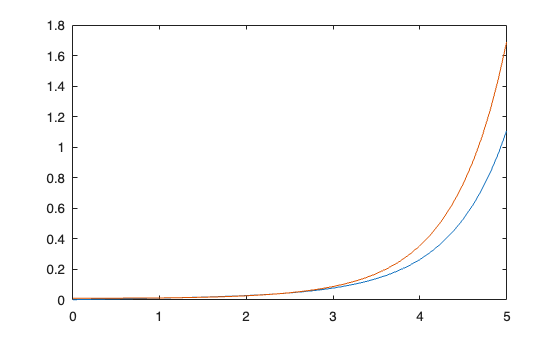

In [12]:
plot(x,v)


&nbsp;&nbsp;&nbsp;&nbsp; 2. If we only want x vs y, we can tell which column to plot for y. Colum 1 = y



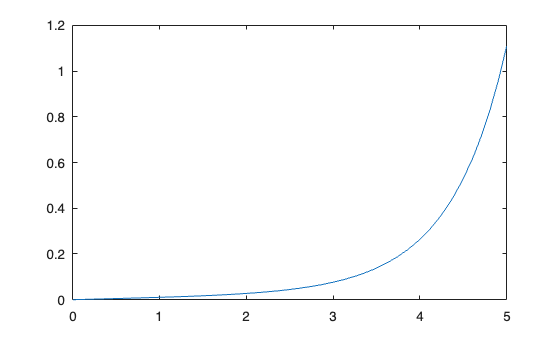

In [13]:
plot(x,v(:,1))


&nbsp;&nbsp;&nbsp;&nbsp; 3. and column 2 = y'



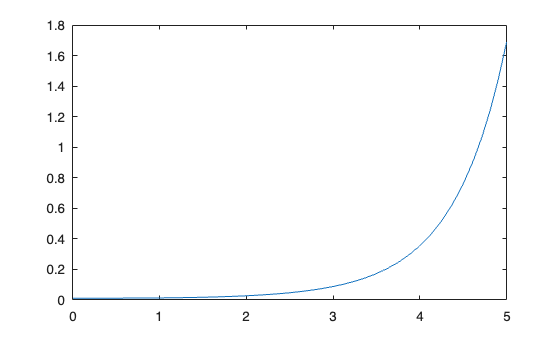

In [14]:
plot(x,v(:,2))